In [67]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import missingno as msno

# Anscombe's quartet datasets

## Load the example dataset for Anscombe's quartet

In [3]:
df_anscombe = sns.load_dataset("anscombe")

## Show the datasets

In [4]:
df_anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


## Visualize the datasets

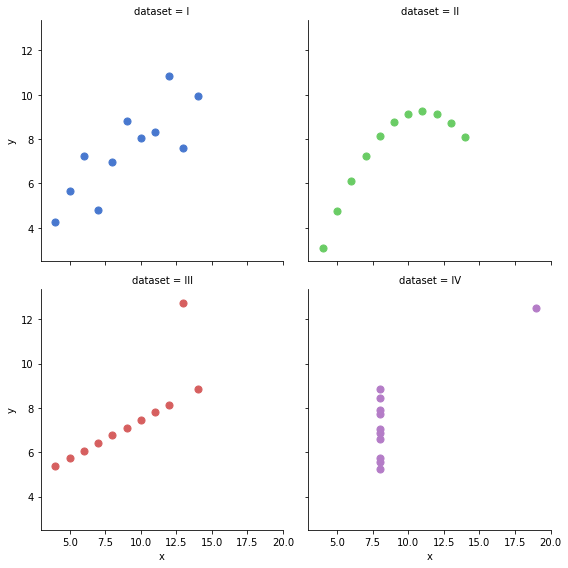

In [5]:
g = sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df_anscombe,
           col_wrap=2, ci=None, palette="muted", size=4, fit_reg=False,
           scatter_kws={"s": 50, "alpha": 1})

# TMDb 5000 movies dataset

The TMDB dataset comprises 4803 movies with 20 fields.

 |Field|Type|Notes
---|---|---
1|budget|numeric|
2|genres|string|
3|homepage|string|
4|id|numeric|
5|keywords|String|
6|original_language|string|
7|original_title|string|
8|overview|string|
9|popularity|numeric| is a value that gets updated daily and takes a number of things into account like views, number of user ratings/watchlist/favourite additions and release date.
10|production_companies|string|
11|production_countries|string|
12|release_date|dateTime|
13|revenue|numeric|
14|runtime|numeric|
15|spoken_languages|string|
16|status|string|either 'Released', 'Post Production', or 'Rumored'
17|tagline|string|a short text identified with the film
18|title|string|
19|vote_average|numeric|
20|vote_count|numeric|

In [6]:
df = pd.read_csv('data/tmdb_5000_movies.csv')

In [7]:
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [8]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [9]:
df.count()

budget                  4803
genres                  4803
homepage                1712
id                      4803
keywords                4803
original_language       4803
original_title          4803
overview                4800
popularity              4803
production_companies    4803
production_countries    4803
release_date            4802
revenue                 4803
runtime                 4801
spoken_languages        4803
status                  4803
tagline                 3959
title                   4803
vote_average            4803
vote_count              4803
dtype: int64

# Missing value

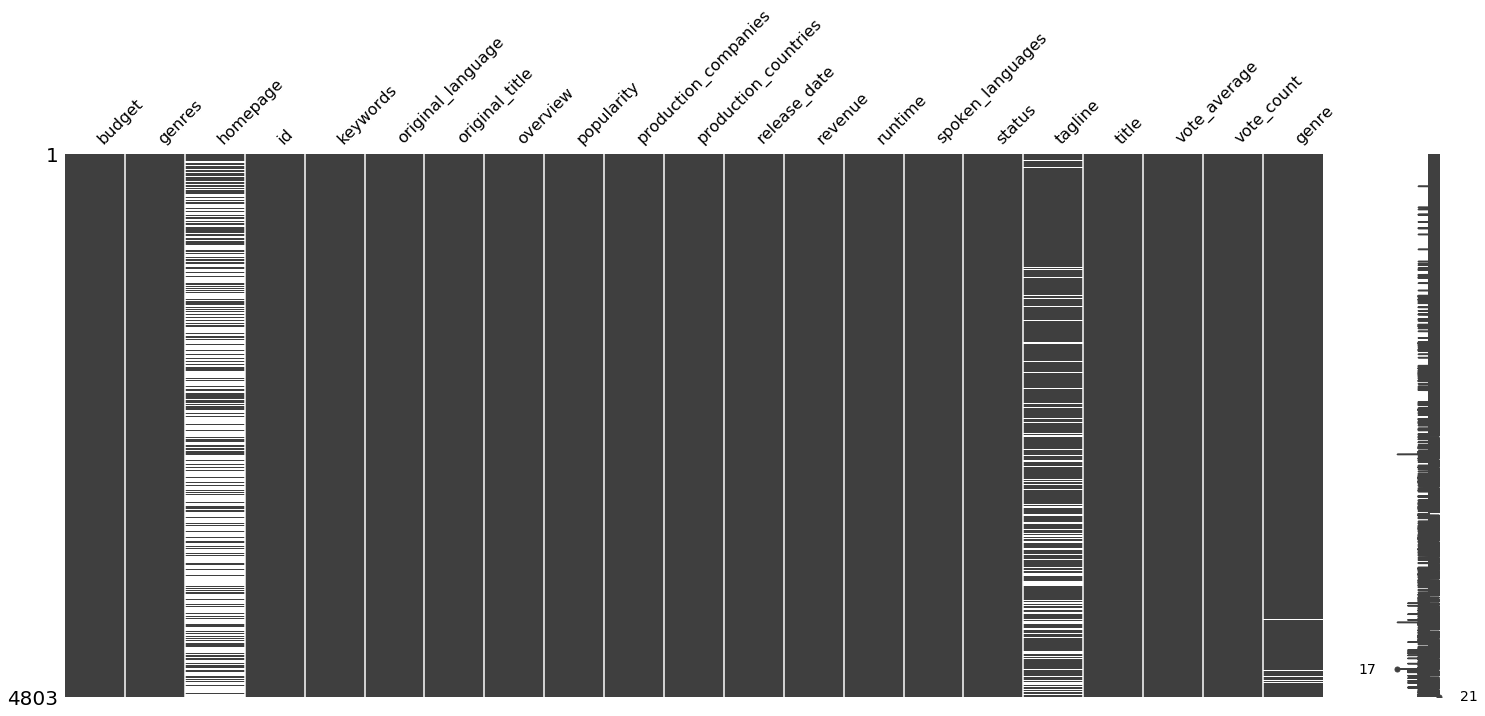

In [69]:
msno.matrix(df)

# Categorical variable vs numerical variable

In this question you will explore a good plot to visualize "Language VS Vote Average" information? Language is a categorical variable and vote_average numerical. We will plot the same data in four charts:
* bar chart
* pie chart
* scatter plot
* box chart

In [10]:
df.count()

budget                  4803
genres                  4803
homepage                1712
id                      4803
keywords                4803
original_language       4803
original_title          4803
overview                4800
popularity              4803
production_companies    4803
production_countries    4803
release_date            4802
revenue                 4803
runtime                 4801
spoken_languages        4803
status                  4803
tagline                 3959
title                   4803
vote_average            4803
vote_count              4803
dtype: int64

In [11]:
lang = df['original_language'].unique()

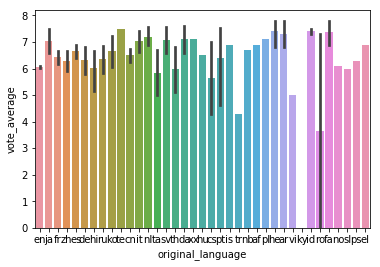

In [12]:
g = sns.barplot(x='original_language', y='vote_average', data=df)

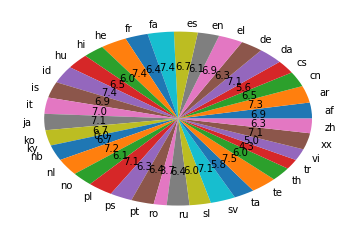

In [13]:
means = df.vote_average.groupby(df.original_language).mean()
total = sum(means)
g = plt.pie(means, labels=means.index, autopct=lambda p: '{:.1f}'.format(p*total/100))

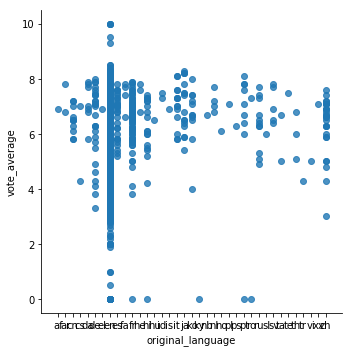

In [14]:
g = sns.lmplot(x='original_language', y='vote_average', data=df, fit_reg=False)

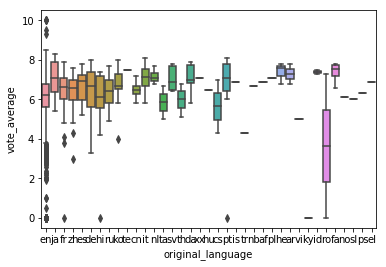

In [15]:
g = sns.boxplot(x='original_language', y='vote_average', data=df)

# Histogram of vote_average

## Too wide bins

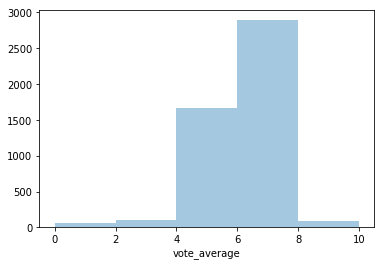

In [39]:
sns.distplot(df['vote_average'].dropna(), kde=False, bins=5)

## Too narrow bins

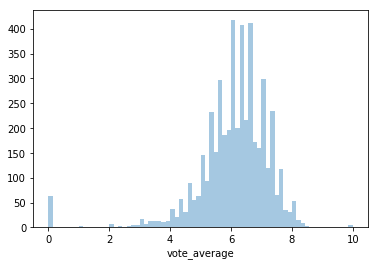

In [46]:
sns.distplot(df['vote_average'].dropna(), kde=False, bins=70)

## Ideal bins

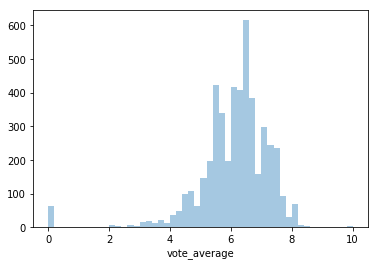

In [54]:
sns.distplot(df['vote_average'].dropna(), kde=False)

## Hard to read

bins have unpretty 1.7 width

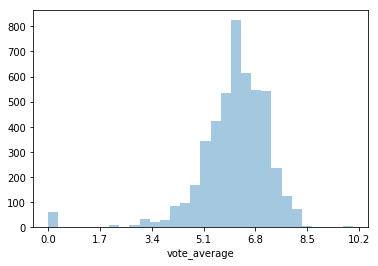

In [64]:
g= sns.distplot(df['vote_average'].dropna(), kde=False, bins=30)
_=g.set_xticks([0, 1.7, 3.4, 5.1, 6.8, 8.5, 10.2])

# Distribution of runtime 

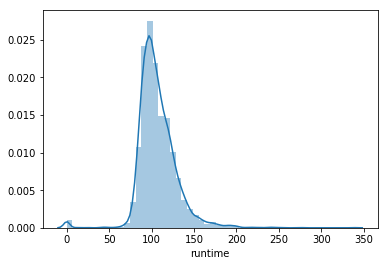

In [16]:
sns.distplot(df['runtime'].dropna())

# Distribution of budget

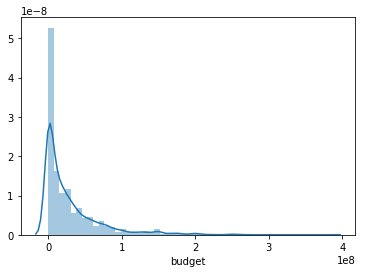

In [17]:
sns.distplot(df['budget'])

# Basic statistics of numeridal fields

In [18]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


# Correlation analysis With Continuous Varibles

In [19]:
columns = df.columns
discrete = []
continuous = []
for i in columns:
    if df[i].dtype =='object':
        discrete.append(i)
    else:
        if i != 'id':
            continuous.append(i)

In [20]:
continuous

['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']

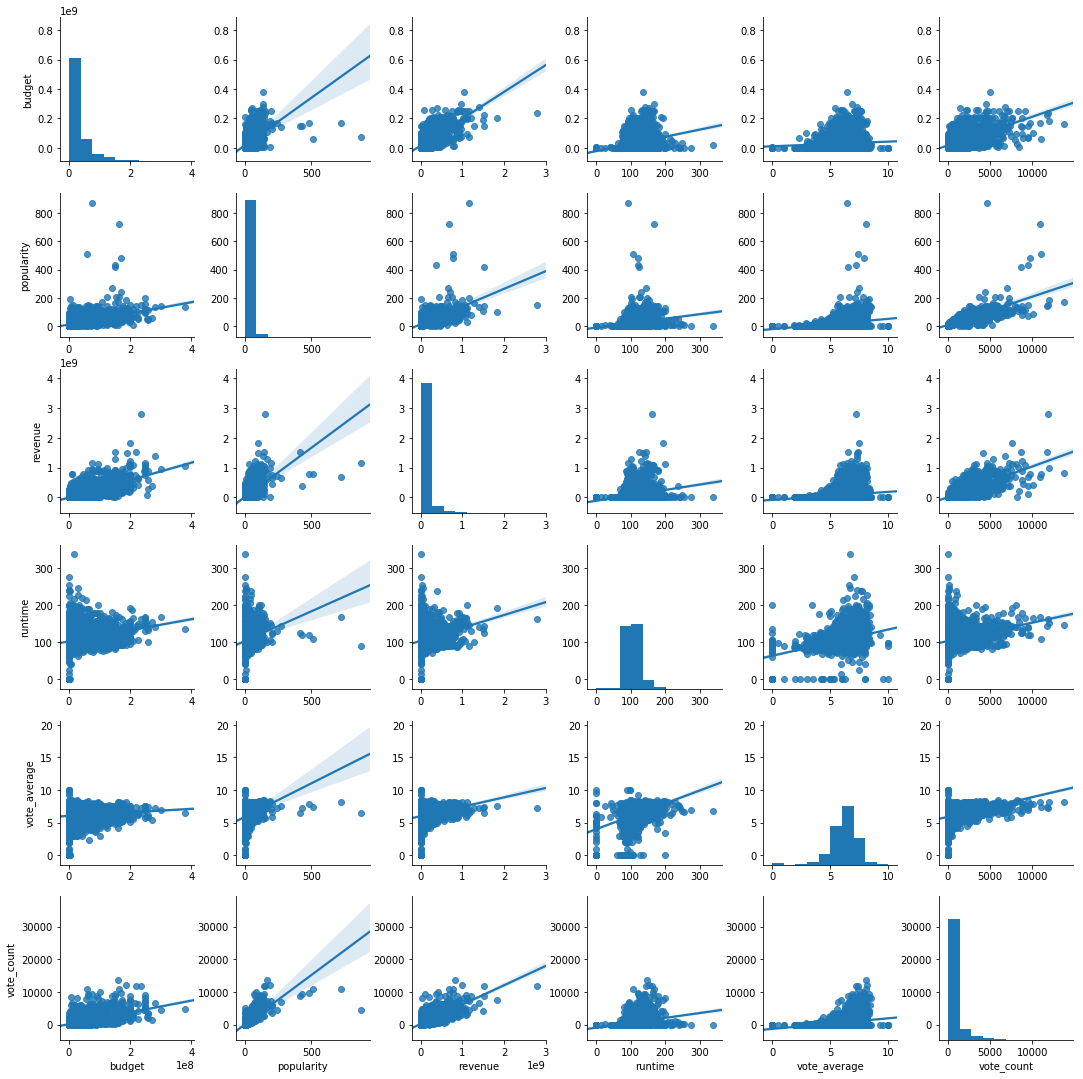

In [21]:
sns.pairplot(df[continuous].dropna(),kind="reg")

In [22]:
df_corr = df[continuous].dropna().corr()

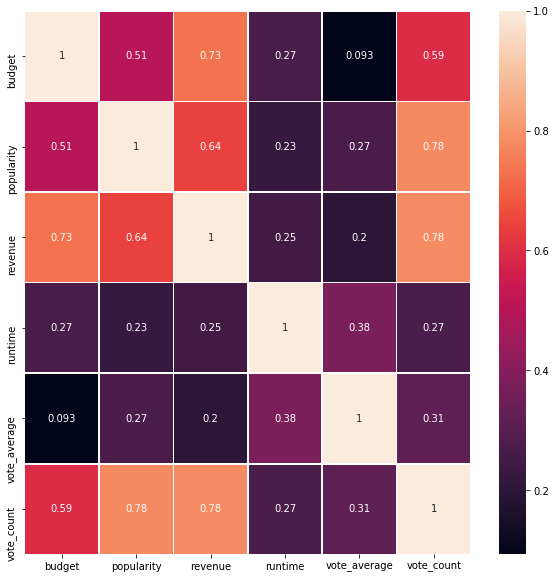

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_corr,
            xticklabels=df_corr.columns.values,
            yticklabels=df_corr.columns.values,
           annot=True, linewidths=.5, ax=ax)

# Regression analysis of budget vs rate average by genre

To simplify the analysis, we only consider the first gener of each movie.
We are also interested in top three genres:
* Action
* Drama
* Comedy

In [24]:
def extract_1st_genre(s):
    genres = json.loads(s)
    if len(genres) > 0:
        return genres[0]['name']
    else:
        return None

In [25]:
df['genre'] = df['genres'].apply(extract_1st_genre)

In [26]:
df['genre'].unique()

array(['Action', 'Adventure', 'Fantasy', 'Animation', 'Science Fiction',
       'Drama', 'Thriller', 'Family', 'Comedy', 'History', 'War',
       'Western', 'Romance', 'Crime', 'Mystery', 'Horror', 'Documentary',
       'Music', 'TV Movie', None, 'Foreign'], dtype=object)

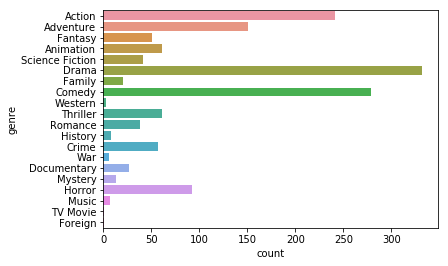

In [27]:
sns.countplot(y='genre', data=df.dropna())

In [28]:
df_top_genres = df.loc[df['genre'].isin(['Action','Drama','Comedy'])]

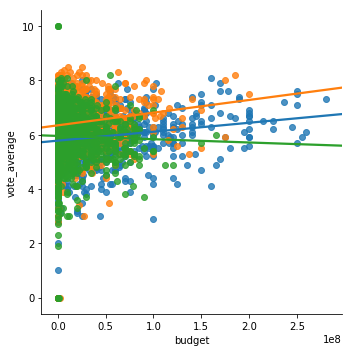

In [29]:
continuous_genre = continuous[:]
continuous_genre.append('genre')
g=sns.lmplot(x="budget", y="vote_average", hue="genre", data=df_top_genres[continuous_genre].dropna(),
            ci=None, legend=False);

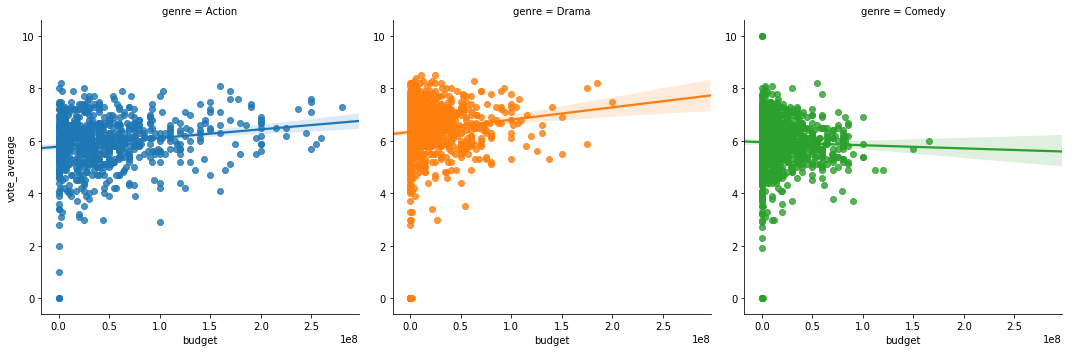

In [30]:
g=sns.lmplot(x="budget", y="vote_average", hue="genre", col="genre", data=df_top_genres[continuous_genre].dropna());

# Credits
* [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe's_quartet)
* [TMDB Movie's ratings Dataset](https://byungjun0689.github.io/3.-IMDB-5000-movie-datasets/)